[118. 117. 116. 115. 114. 113. 112. 111. 110. 109. 108. 107. 106. 105.
 104. 103. 102. 101. 100.  99.  98.  97.  96.  95.  94.  93.  92.  91.
  90.  89.  88.  87.  86.  85.  84.  83.  82.  81.  80.  79.  78.  77.
  76.  75.  74.  73.  72.  71.  70.  69.  67.  66.  65.  64.  63.  62.
  57.  54.  53.  42.  31.  29.]


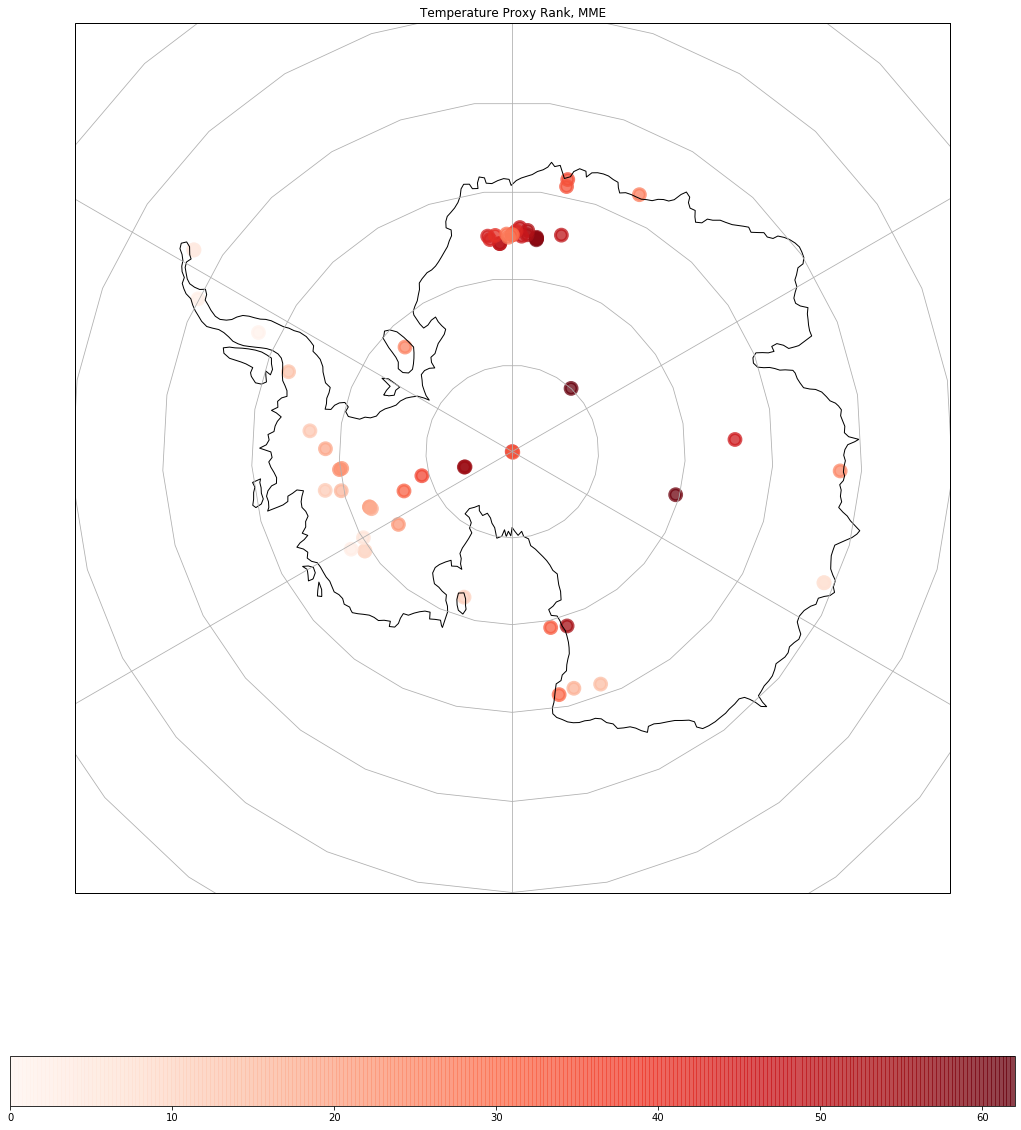

In [16]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import pandas as pd

def tempPlot(): 
    sites = np.array(pd.read_csv('Sites.csv'))
    rank = np.array(pd.read_csv('Sites4.csv'))
    newSites = np.zeros_like(sites)
    
    accumSites = np.copy(sites[:56])
    isoSites = np.copy(sites[56:])
    
    accumCount = 0
    isoCount = 0
    
    accumCol = np.zeros([56])
    isoCol = np.zeros([62])
    
    for i in range(118):
        newSites[i] = sites[rank[i] - 1]
        if rank[i] - 1 < 56:
            accumSites[accumCount] = sites[rank[i] - 1]
            accumCol[accumCount] = 118 - i
            accumCount = accumCount + 1
        else:
            isoSites[isoCount] = sites[rank[i] - 1]
            isoCol[isoCount] = 118 - i
            isoCount = isoCount + 1
    
    t = 118 - np.arange(118)
    
    tempC = 62 - np.arange(62)
    accumC = 56 - np.arange(56)
    
    print(isoCol)

    ax = plt.axes(projection=ccrs.SouthPolarStereo())

    
    ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

    ax.gridlines()
    
    plt.rcParams['figure.figsize'] = [20, 20]


    plt.scatter(isoSites[:, 1], isoSites[:, 0], s=140, c=tempC, cmap=plt.cm.Reds, linewidth=3, alpha=0.75, vmin=0, vmax=62, zorder=1, transform=ccrs.PlateCarree())
    plt.colorbar(orientation="horizontal", fraction=0.05, shrink=0.9, cmap=plt.cm.Greens)
    plt.title("Temperature Proxy Rank, MME")
    
    ax.coastlines()
    
    plt.show()
    
tempPlot()